# Popular Data Science Questions

**What the project is about:** In this project, I'll be working for a hypothetical company that creates data science content - be it books, online articles, videos or interactive text-based platforms.

I've been tasked with figuring out the best content to write about. And since I'm passionate about helping people learn, I've decided to scour the internet in search for the answer to the question, "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance).

Thinking back on my own experience when I first started learning programming, it occured to me that if I wanted to figure out what programming content to write, I could consult Stack Overflow (a question and answer website about programming) and see what kind of content is more popular.

With that in mind, I decided to investigate Stack Overflow a little more and found out that it is part of a question and answer website network called Stack Exchange.

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and (of course) data science! Stack Exchange also employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

**Goal of the project:** My goal in this project is to use the [Data Science Stack Exchange](https://datascience.stackexchange.com/) to determine what content should a data science education company create, based on interest by subject.

## Stack Exchange

**What kind of questions are welcome on this site?**

On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking), it reads that one should:

- Avoid subjective questions.
- Ask practical questions about Data Science — there are adequate sites for theoretical questions.
- Ask specific questions.
- Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to my goal.

In the help center I also see that in addition to the sites mentioned in the *Learn* section, there are other two sites that are relevant:

- [Open Data](https://opendata.stackexchange.com/help/on-topic) (Dataset requests)
- [Computational Science](https://scicomp.stackexchange.com/help/on-topic) (Software packages and algorithms in applied mathematics)

**What, other than questions, does DSSE's home subdivide into?**

On the [home page](https://datascience.stackexchange.com/), I can see that there are four sections:

- [Questions](https://datascience.stackexchange.com/questions) — a list of all questions asked;
- [Tags](https://datascience.stackexchange.com/tags) — a list of tags (keywords or labels that categorize questions);
- [Users](https://datascience.stackexchange.com/users) — a list of users;
- [Unanswered](https://datascience.stackexchange.com/unanswered) — a list of unanswered questions;

The tagging system used by Stack Exchange looks just like what I need to solve this problem as it allow me to quantify how many questions are asked about each subject.

Something else I can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives me some confidence in using the tagging system to derive conclusions.

**What information is available in each post?**

Looking, just as an example, at [this question](https://datascience.stackexchange.com/questions/19141/linear-model-to-generate-probability-of-each-possible-output?rq=1), some of the information I see is:

- For both questions and answers:
    - The posts's score;
    - The posts's title;
    - The posts's author;
    - The posts's body;
- For questions only:
    - How many users have it on their "
    - The last time the question as active;
    - How many times the question was viewed;
    - Related questions;
    - The question's tags;

## Stack Exchange Data Explorer

Perusing the table names, a few stand out as relevant for my goal:

- Posts
- PostTags
- Tags
- TagSynonyms

Running a few exploratory queries, leads me to focus my efforts on the `Posts` table. For example, the `Tags` table looked very promising - as it tells me how many times each tag was used - but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

## Getting the Data

To get the relevant data, I run the following query:

`SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;`

## Exploring the Data

I can read in the data while immediately making sure `CreationDate` will be stored as a datetime object:

In [3]:
# I import everything that I'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

Running `questions.info()` should provide me with a lot of useful information.

In [5]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


I see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so I can replace the missing values with zero.

The types seem adequate for every column, however, after I fill in the missing values on `FavoriteCount`, there is no reason to store the values as floats.

Since the `object` dtype is a catch-all type, let's see what types the objects in `questions["Tags"]` are.

In [6]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

Now I see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags ([source](https://meta.stackexchange.com/a/18879)), so one way to deal with this column is to create five columns in `questions` called `Tag1`, `Tag2`, `Tag3`, `Tag4`, and `Tag5` and populate the columns with the tags in each row.

However, since it doesn't help relating tags from one question to another, I'll just keep them as a list.

## Cleaning the Data

I'll start by fixing `FavoriteCount`.

In [7]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

Next, I'll modify `Tags` to make it easier to work with.

In [8]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
6397,63826,2019-11-27 03:57:32,0,103,"[apache-spark, pyspark]",1,0
1732,57031,2019-08-06 07:11:23,1,62,"[neural-network, deep-learning, cnn]",2,0
8161,65263,2019-12-22 05:35:38,0,8,"[svm, mini-batch-gradient-descent, hinge-loss]",0,0


## Most Used and Most Viewed

Now, I can go ahead and count how many times each tag was used.

In [9]:
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

For improved aesthetics, I'll transform `tag_count` in a dataframe.

In [10]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
distribution,57
regex,8
software-recommendation,4
julia,2
apache-hadoop,13
implementation,9
experiments,3
openai-gym,17
h2o,4
categorical-data,81


Next, I'll sort this dataframe by `Coun`t and visualize the top 20 results.

In [11]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


The threshold of 20 is somewhat arbitrary and I can experiment with others; however, the popularity of the tags rapidly declines, so looking at these tags should be enough to help me with my goal. Let's visualize these data.

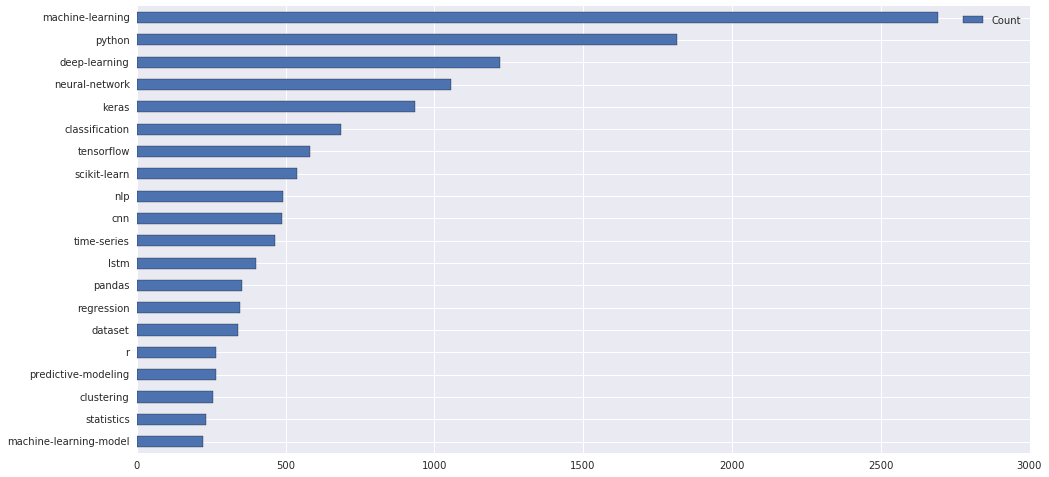

In [12]:
most_used.plot(kind="barh", figsize=(16,8))

Some tags are very, very broad and are unlikely to be useful (e.g. `python`, `dataset`, `r`). But before I investigate the tags further, I'll repeat the same process for views.

To do this, I'll use pandas's `pandas.DataFrame.iterrows()`.

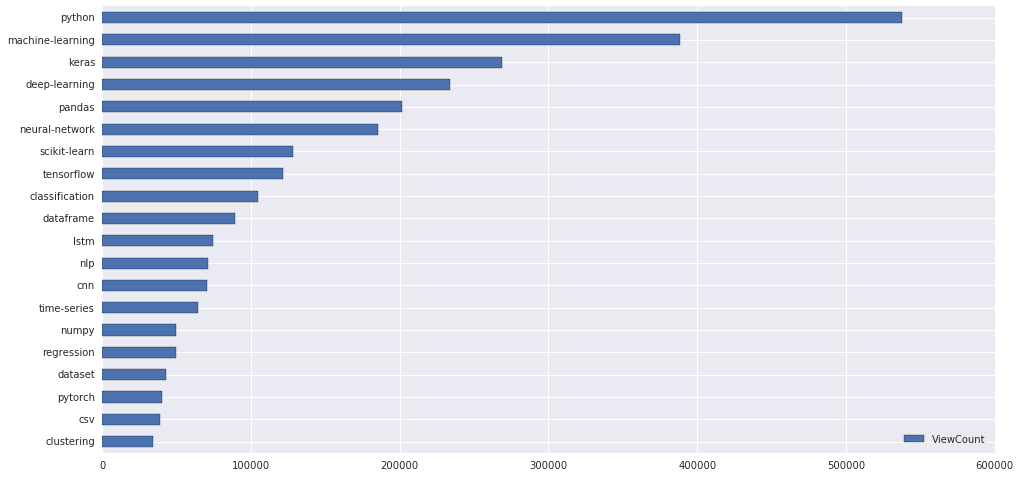

In [13]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

Let's view them side by side.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a97e27470>],
      dtype=object)

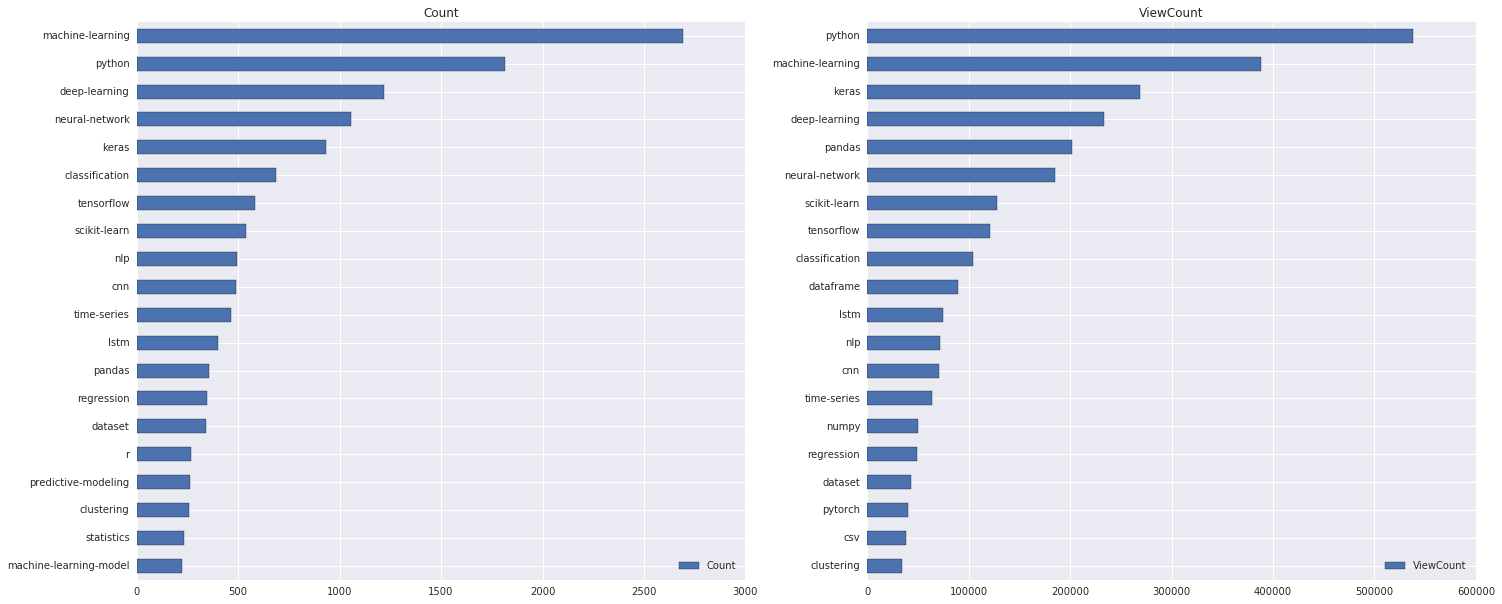

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [15]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

## Relations Between Tags

One way of trying to gauge how pairs of tags are related to each other is to count how many times each pair appears together. So, let's go ahead and do this.

I'll begin by creating a list of all tags.

In [16]:
all_tags = list(tag_count.index)

Next, I'll create a dataframe where each row will represent a tag, and each column as well.

In [17]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,distribution,regex,software-recommendation,julia
distribution,NaN,NaN,NaN,NaN
regex,NaN,NaN,NaN,NaN
software-recommendation,NaN,NaN,NaN,NaN
julia,NaN,NaN,NaN,NaN


I will now fill this dataframe with zeroes and then, for each lists of tags in `questions["Tags"]`, I will increment the intervening tags by one. The end result will be a dataframe that, for each pair of tags, tells me how many times they were used together.

In [18]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

This dataframe is quite large, so I'll focus my attention on the most used tags. I'll also add some colors to make it easier to talk about the dataframe.

In [19]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


The cells highlighted in yellow tell me that `time-series` was used together with `r` 22 times. The values in blue tell me how many times each of the tags was used. I saw earlier that `machine-learning` was used 2693 times and I can confirm that in this dataframe.

It's hard for a human to understand what is going on in this dataframe. To make things visually easier, I'll create a heatmap. But before I do, I'll get rid of the values in blue, otherwise the colors will be too skewed.

In [20]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

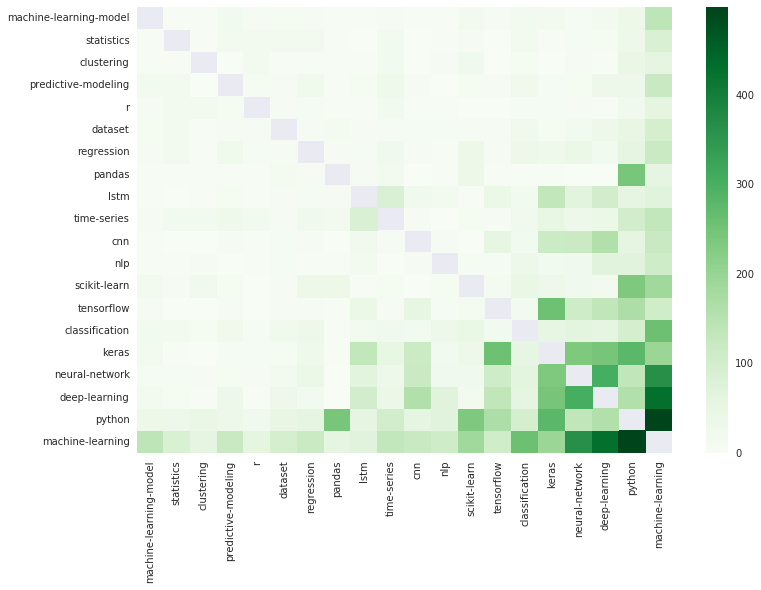

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and often end up being used together without possibly having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following: A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, `dataset` and `scikit-learn` have a "strong" relation to `pandas`, but each by itself does not.

So how do I attack both these problems? There is a powerful data mining technique that allows data scientists to handle this: [association rules](https://en.wikipedia.org/wiki/Association_rule_learning). Association rules allow me to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, I can also measure how strong these relations are on several fronts: how common each relation is, how strong it is, and how independent the components of the relationship are.

## Enter Domain Knowledge

Keras, scikit-learn, and TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If I want to be extra specific, I can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At a glance, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by my analysis, is deep learning.

## Just a Fad?

Let's read in the file into a dataframe called `all_q`. I'll parse the dates at read-time.

In [22]:
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

I can use the same technique as before to clean the tags column.

In [23]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

Before deciding which questions should be classified as being deep learning questions, I should decide which tags are deep learning tags.

The definition of what constitutes a deep learning tag is a tag that belongs to the list `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.

This list was obtained by looking at all the tags in `most_used` and seeing which ones had any relation to deep learning.

I'll now create a function that assigns `1` to deep learning questions and `0` otherwise; and then use it.

In [24]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [25]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [26]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
12289,30210,2018-04-12 06:22:25,"[dataset, visualization, data]",0
4299,57245,2019-08-08 15:33:39,"[python, seaborn]",0
6582,17695,2017-03-19 17:17:02,"[python, dataset, regression]",0
16199,45054,2019-02-04 22:45:45,"[scikit-learn, outlier]",1
21205,66551,2020-01-16 06:45:13,"[cnn, image-preprocessing]",1


Looks good!

The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since I don't have all the data for the first quarter of 2020, I'll get rid of those dates:

In [27]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

Next, I'll create a column that identifies the quarter in which a question was asked.

In [28]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [29]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1



For the final stretch, I'll group by quarter and:

- Count the number of deep learning questions
- Count the total number of questions
- Compute the ratio between the two numbers above

In [30]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
7,16Q1,110,516,0.213178
10,16Q4,177,527,0.335863
13,17Q3,247,714,0.345938
12,17Q2,226,647,0.349304
11,17Q1,242,698,0.346705


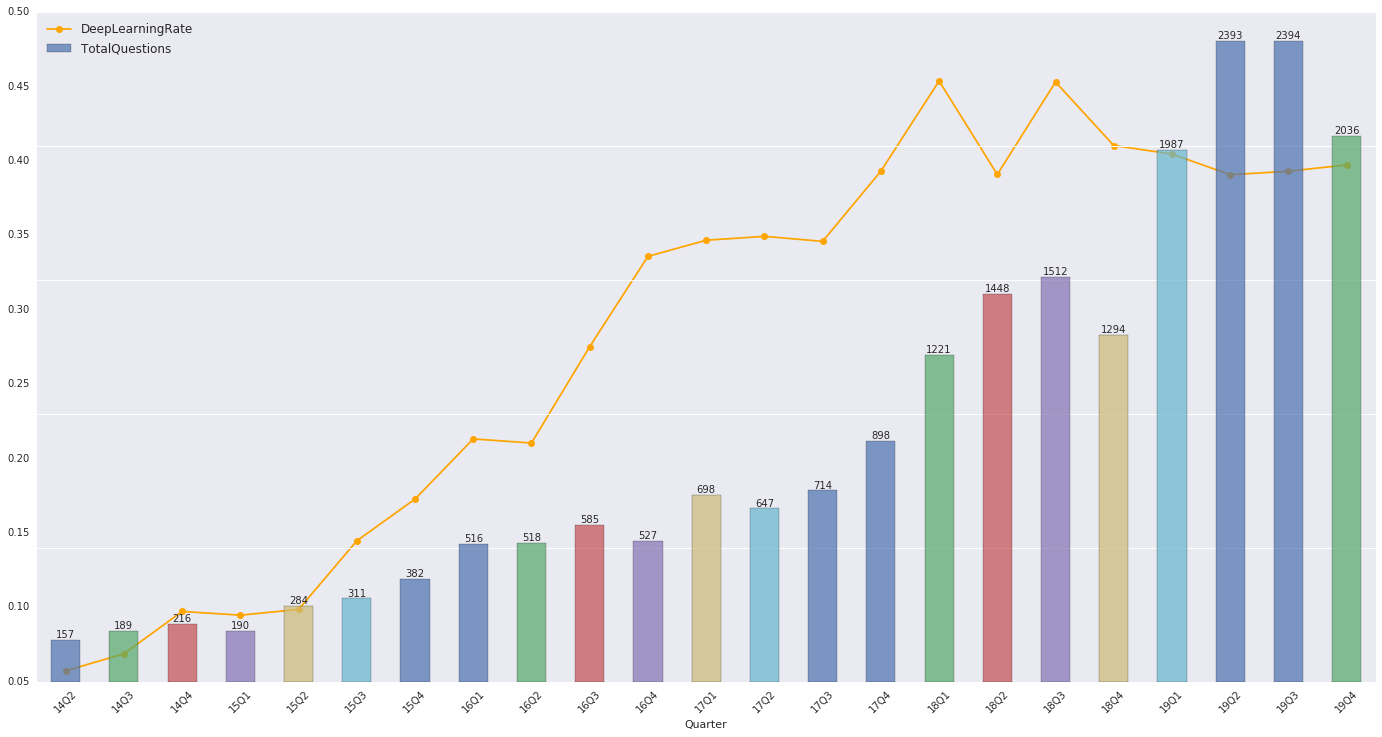

In [31]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)


It seems that deep learning questions were a high-growth trend since the start of DSSE, but it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so I maintain my previous idea of proposing that my client create deep learning content.